False Positive Rate: 0.0508


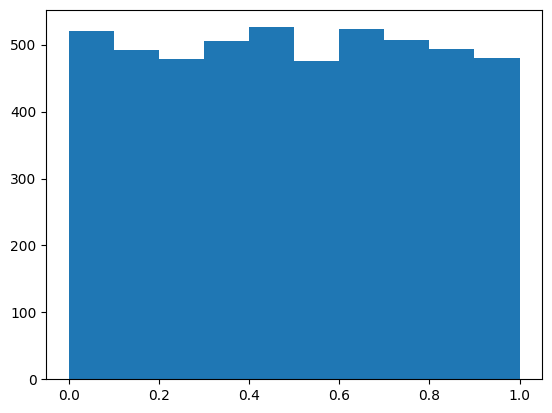

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
#bài Problem sao

def build_A1(x, j):
    n = len(x)
    constraints = []
    for i in range(n):
        if i == j:
            continue
    
        a1 = np.zeros(n)
        a1[j] = -1
        a1[i] = 1
        constraints.append(a1)

        a2 = np.zeros(n)
        a2[j] = -1
        a2[i] = -1
        constraints.append(a2)
    return np.array(constraints)   

def build_A2(x, j):
    n = len(x)
    constraints = []
    for i in range(n):
        if i == j:
            continue
    
        a1 = np.zeros(n)
        a1[j] = 1
        a1[i] = -1
        constraints.append(a1)

        a2 = np.zeros(n)
        a2[j] = 1
        a2[i] = 1
        constraints.append(a2)
    return np.array(constraints)   
   
def run(): #Bài 1 trị tuyệt đối
    sigma_e=np.identity(3)
    loc=np.array([0,0,0])
    e=np.random.multivariate_normal(loc,  sigma_e)
    e=e.reshape((3,1))

    mu=np.zeros((3,1)) 
    x=mu+e
    x_abs=np.abs(x)
    j=np.argmax(x_abs)
    #print(x_abs)
    
    eta=np.zeros((3,1)) # vecto cột
    eta[j] = 1
    #print(eta)
    
    T=np.dot(eta.T,x)[0][0]
    sigma_T = np.dot(eta.T, np.dot(sigma_e,eta))[0][0]
    sigma_T =np.sqrt(sigma_T)
    #print(T)

    #Tính c và z
    Iden=np.identity(3)
    mau_c= np.dot(eta.T, np.dot(Iden, eta))
    tu_c=np.dot(Iden, eta)
    c=np.dot(tu_c, np.linalg.inv(mau_c))
    #print (c) # Ma trận (3,1)
    c_etaT =np.dot(c, eta.T)
    z=np.dot((Iden-c_etaT), x)
    #print(z)

    # Tính z_max, z_min
    if x[j] >=0:
        A=build_A1(x,j)
    else:
        A=build_A2(x,j)
    
    vt_b=np.zeros((4,1))
    
    Ac=np.dot(A,c)
    k= (vt_b-np.dot(A,z))
    max_Vz=-np.inf
    min_Vz=np.inf
    for i in range(2*(len(x)-1)):
        
        if Ac[i]<0 and (k[i]/Ac[i]> max_Vz):
            max_Vz=k[i]/Ac[i]
        if Ac[i] >0 and (k[i]/Ac[i]< min_Vz):
            min_Vz=k[i]/Ac[i]
    
    #truncated normal distribution
    cdf=truncnorm.cdf(T,max_Vz,min_Vz,loc=0, scale=sigma_T)
    p_value=2*min(cdf,1-cdf)
    p_value=p_value[0]
    return p_value

if __name__ == '__main__':
    max_iteration = 5000
    list_p_value = []

    alpha = 0.05
    count = 0

    for _ in range(max_iteration):
        p_value = run()
        list_p_value.append(p_value)
        
        if p_value <= alpha:
            count = count + 1

    print('False Positive Rate:', count / max_iteration)
    plt.hist(list_p_value)
    plt.show()
    

False Positive Rate: 0.0554


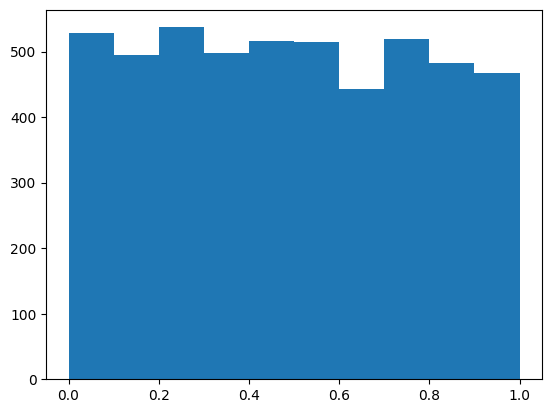

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
#Bài Problem thường

def build_A(x,j):
    n = len(x)
    constraints = []
    for i in range(n):
        if i == j:
            continue
    
        a1 = np.zeros(n)
        a1[j] = -1
        a1[i] = 1
        constraints.append(a1)
    return np.array(constraints)
    
def test(): #Bài 1
    sigma_e=np.identity(3)
    loc=np.array([0,0,0])
    e=np.random.multivariate_normal(loc,  sigma_e)
    e=e.reshape((3,1))

    mu=np.zeros((3,1)) 
    x=mu+e
    
    j=np.argmax(x)
    max_x=np.max(x)
    eta=np.array([[1], [1], [1]])
    index=0
    for i in range(len(x)):
        if i!= j: 
            eta[i, 0]=0

    T=np.dot(eta.T, x)[0][0]
    sigma_T = np.dot(eta.T, np.dot(sigma_e,eta))[0][0]
    sigma_T =np.sqrt(sigma_T)
    
    #Create z,c
    Iden=np.identity(3)
    tu_c=np.dot(Iden,eta)
    mau_c=np.dot(np.dot(eta.T,Iden),eta)
    c=np.dot(tu_c, np.linalg.inv(mau_c))
    c_etaT=np.dot(c,eta.T)
    z=np.dot(Iden-c_etaT,x)
    
    #Ax<=b
    vt_b=np.zeros((2,1))
    A=build_A(x,j)
   

            
    Ac=np.dot(A,c)
    k= (vt_b-np.dot(A,z))
    max_Vz=-np.inf
    min_Vz=np.inf
    for j in range(len(x)-1):
        if Ac[j]<0 and (k[j]/Ac[j]> max_Vz):
            max_Vz=k[j]/Ac[j]
        if Ac[j] >0 and (k[j]/Ac[j]< min_Vz):
            min_Vz=k[j]/Ac[j]
   
            
    cdf=truncnorm.cdf(T,max_Vz, min_Vz,loc=0, scale=sigma_T)
    p_value=2*min(cdf, 1-cdf)
    return p_value[0] 
    
if __name__ == '__main__':
    max_iteration = 5000
    list_p_value = []

    alpha = 0.05
    count = 0

    for _ in range(max_iteration):
        p_value = test()
        list_p_value.append(p_value)
        
        if p_value <= alpha:
            count = count + 1

    print('False Positive Rate:', count / max_iteration)
    plt.hist(list_p_value)
    plt.show()